# CMPE 257 Homework 2

## Question 1

### a. Load dataset from csv file.

Note: Please load the dataset from the URL as shown in the demo 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("datasetHW2.csv", header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
4,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [4]:
data.shape

(20641, 10)

In [5]:
data =data.dropna(how='any') #dropping all NaN values

### b. Remove the header which is 0th row.

In [6]:
data = data.iloc[1:]
from sklearn import preprocessing

x = data.iloc[:, data.columns != 8]
y = data.iloc[:, [8]]


In [7]:
loc = data.iloc[:, [9]] #extracting last column

In [8]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LabelEncoder_X= LabelEncoder()

loc = LabelEncoder().fit_transform(loc) #relabling last column 

C:\Users\X\anaconda3\envs\cmpe257\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [9]:
loc

array([3, 3, 3, ..., 1, 1, 1])

In [10]:
x.loc[:,9] = loc


C:\Users\X\anaconda3\envs\cmpe257\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [11]:
x

,0,1,2,3,4,5,6,7,9
1,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
2,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
3,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
4,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
5,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...,...
20636,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20637,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20638,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,1
20639,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [12]:
preprocessedX = pd.DataFrame(data=x) #saving new data frame
print(preprocessedX) 

             0      1     2       3       4       5       6       7  9
1      -122.23  37.88  41.0   880.0   129.0   322.0   126.0  8.3252  3
2      -122.22  37.86  21.0  7099.0  1106.0  2401.0  1138.0  8.3014  3
3      -122.24  37.85  52.0  1467.0   190.0   496.0   177.0  7.2574  3
4      -122.25  37.85  52.0  1274.0   235.0   558.0   219.0  5.6431  3
5      -122.25  37.85  52.0  1627.0   280.0   565.0   259.0  3.8462  3
...        ...    ...   ...     ...     ...     ...     ...     ... ..
20636  -121.09  39.48  25.0  1665.0   374.0   845.0   330.0  1.5603  1
20637  -121.21  39.49  18.0   697.0   150.0   356.0   114.0  2.5568  1
20638  -121.22  39.43  17.0  2254.0   485.0  1007.0   433.0     1.7  1
20639  -121.32  39.43  18.0  1860.0   409.0   741.0   349.0  1.8672  1
20640  -121.24  39.37  16.0  2785.0   616.0  1387.0   530.0  2.3886  1

[20433 rows x 9 columns]


### c. Split the dataset into 70:30 training set and test set (non-repetitive random selection).

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state =1)

### d. Plot each feature against the target in the training set.

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [15]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [16]:
X_train

,0,1,2,3,4,5,6,7,9
5166,-118.29,33.95,39.0,1701.0,428.0,1468.0,411.0,1.9702,0
12862,-121.38,38.7,25.0,3919.0,764.0,2203.0,783.0,2.2402,1
20233,-119.29,34.23,22.0,2486.0,608.0,709.0,523.0,2.9018,4
11693,-117.99,33.87,34.0,1239.0,307.0,869.0,291.0,3.59,0
13208,-117.71,34.05,20.0,2281.0,444.0,1545.0,481.0,2.5735,1
...,...,...,...,...,...,...,...,...,...
11066,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,0
17456,-120.43,34.7,26.0,2353.0,389.0,1420.0,389.0,3.87,4
5250,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,0
12291,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,1


In [17]:
X_test

,0,1,2,3,4,5,6,7,9
6716,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,0
4122,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,0
15434,-117.25,33.2,10.0,2050.0,473.0,1302.0,471.0,2.7961,0
20273,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,4
11844,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,1
...,...,...,...,...,...,...,...,...,...
10514,-117.7,33.51,2.0,5261.0,763.0,1460.0,599.0,6.8279,0
8883,-118.51,34.04,40.0,1382.0,167.0,483.0,178.0,11.7045,0
9201,-119.68,37.35,13.0,2307.0,386.0,925.0,347.0,3.1326,1
5961,-117.83,34.11,29.0,2671.0,437.0,1484.0,445.0,4.9844,1


In [18]:
y_train

,8
5166,93200.0
12862,89500.0
20233,275000.0
11693,161900.0
13208,130500.0
...,...
11066,190300.0
17456,125800.0
5250,500001.0
12291,91200.0


In [19]:
y_test

,8
6716,360900.0
4122,291500.0
15434,131300.0
20273,500001.0
11844,118800.0
...,...
10514,279000.0
8883,500001.0
9201,119800.0
5961,203000.0


In [20]:
y_pred

array([[376219.94283169],
       [273522.54809033],
       [146884.05426828],
       ...,
       [ 88487.67508933],
       [226055.22761024],
       [248042.04805427]])

In [21]:
df = pd.DataFrame(data=y_pred)
print(df)

                  0
0     376219.942832
1     273522.548090
2     146884.054268
3     357301.698624
4      30134.778012
...             ...
6125  312457.337300
6126  545430.588408
6127   88487.675089
6128  226055.227610
6129  248042.048054

[6130 rows x 1 columns]


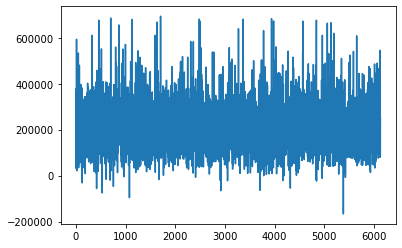

In [22]:
plt.plot(y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

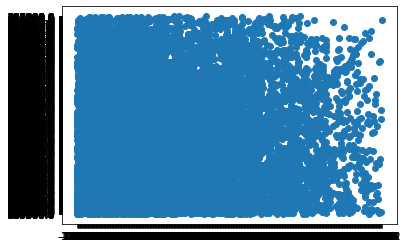

In [23]:
X =X_train.iloc[:,0]
Y =y_train.iloc[:,0]
plt.scatter(X,Y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

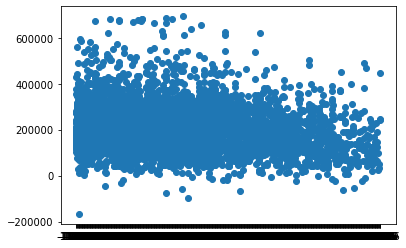

In [24]:
X =X_test.iloc[:,0]
Y =df.iloc[:,0]
plt.scatter(X,Y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

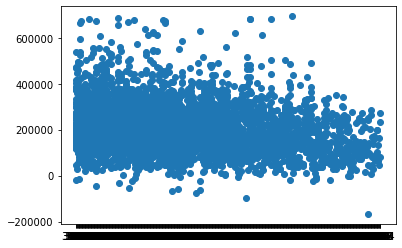

In [25]:
X =X_test.iloc[:,1]
Y =df.iloc[:,0]
plt.scatter(X,Y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

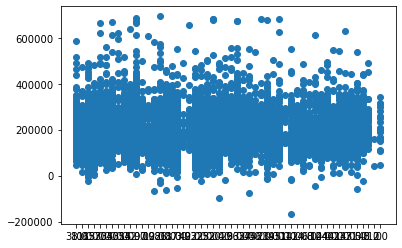

In [26]:
X =X_test.iloc[:,2]
Y =df.iloc[:,0]
plt.scatter(X,Y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

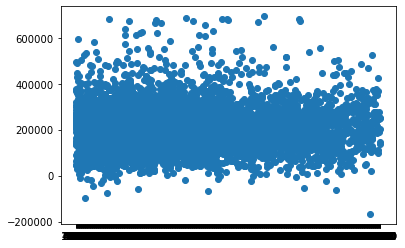

In [27]:
X =X_test.iloc[:,4]
Y =df.iloc[:,0]
plt.scatter(X,Y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

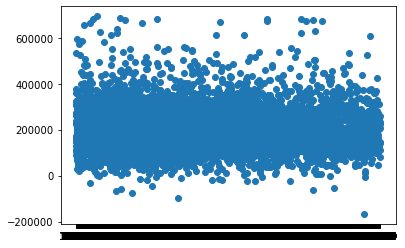

In [28]:
X =X_test.iloc[:,5]
Y =df.iloc[:,0]
plt.scatter(X,Y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

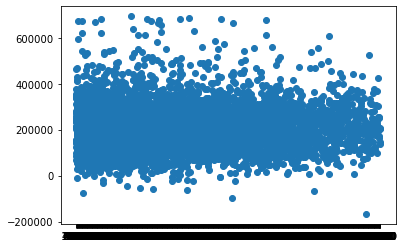

In [29]:
X =X_test.iloc[:,6]
Y =df.iloc[:,0]
plt.scatter(X,Y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

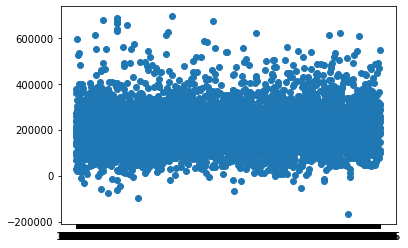

In [30]:
X =X_test.iloc[:,7]
Y =df.iloc[:,0]
plt.scatter(X,Y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

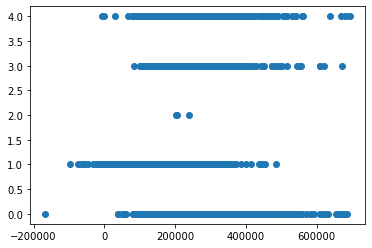

In [31]:
Y =X_test.iloc[:,8]
X =df.iloc[:,0]
plt.scatter(X,Y)
plt.show

### e. Write down your observations on the above plots to find which features had maximum influence on the target.

In [32]:
#ocean proximity tended to have the most clear impact on median house value

### f. What kind of a problem is this? (eg. classification, regression, clustering, etc).

In [33]:
#regression because we are trying to predict a value of a house based on other parameters 

### g. Get the quick description of data using info() and description() functions.

In [34]:
preprocessedX.info

<bound method DataFrame.info of              0      1     2       3       4       5       6       7  9
1      -122.23  37.88  41.0   880.0   129.0   322.0   126.0  8.3252  3
2      -122.22  37.86  21.0  7099.0  1106.0  2401.0  1138.0  8.3014  3
3      -122.24  37.85  52.0  1467.0   190.0   496.0   177.0  7.2574  3
4      -122.25  37.85  52.0  1274.0   235.0   558.0   219.0  5.6431  3
5      -122.25  37.85  52.0  1627.0   280.0   565.0   259.0  3.8462  3
...        ...    ...   ...     ...     ...     ...     ...     ... ..
20636  -121.09  39.48  25.0  1665.0   374.0   845.0   330.0  1.5603  1
20637  -121.21  39.49  18.0   697.0   150.0   356.0   114.0  2.5568  1
20638  -121.22  39.43  17.0  2254.0   485.0  1007.0   433.0     1.7  1
20639  -121.32  39.43  18.0  1860.0   409.0   741.0   349.0  1.8672  1
20640  -121.24  39.37  16.0  2785.0   616.0  1387.0   530.0  2.3886  1

[20433 rows x 9 columns]>

In [35]:
preprocessedX.describe

<bound method NDFrame.describe of              0      1     2       3       4       5       6       7  9
1      -122.23  37.88  41.0   880.0   129.0   322.0   126.0  8.3252  3
2      -122.22  37.86  21.0  7099.0  1106.0  2401.0  1138.0  8.3014  3
3      -122.24  37.85  52.0  1467.0   190.0   496.0   177.0  7.2574  3
4      -122.25  37.85  52.0  1274.0   235.0   558.0   219.0  5.6431  3
5      -122.25  37.85  52.0  1627.0   280.0   565.0   259.0  3.8462  3
...        ...    ...   ...     ...     ...     ...     ...     ... ..
20636  -121.09  39.48  25.0  1665.0   374.0   845.0   330.0  1.5603  1
20637  -121.21  39.49  18.0   697.0   150.0   356.0   114.0  2.5568  1
20638  -121.22  39.43  17.0  2254.0   485.0  1007.0   433.0     1.7  1
20639  -121.32  39.43  18.0  1860.0   409.0   741.0   349.0  1.8672  1
20640  -121.24  39.37  16.0  2785.0   616.0  1387.0   530.0  2.3886  1

[20433 rows x 9 columns]>

### h. Perform min-max normalization on features and target.

In [36]:
from sklearn import preprocessing
x = preprocessedX.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
preprocessedX = pd.DataFrame(x_scaled)

In [37]:
preprocessedX

,0,1,2,3,4,5,6,7,8
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.75
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.75
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.75
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.75
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.75
...,...,...,...,...,...,...,...,...,...
20428,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.25
20429,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.25
20430,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.25
20431,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.25


### i. Describe rules of NumPy Broadcasting.

In [38]:
#broadcasting allows for arithmetic between arrays of different shapes by replicating the smaller array 
#broadcasting is limited to arrays of same size or dimention 1
#

### j. Describe the purpose of numpy.reshape with a valid example


In [39]:
#reshape has the ability to change the shape of an array without changing the data inside. 
#This is commonly used when flattening data for example
#when working with images and their pixal values.

## Question 2
Boston housing dataset is a famous dataset widely used for machine learning. In this problem, you will train
a linear regression model that predicts the house price using the Boston housing dataset.

### a. Load Boston house prices dataset. Plot each feature against the target in the training set.  Write down your observations on the above plots to find which features had maximum influence on the target.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html


In [40]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)
data2= load_boston()


(506, 13)


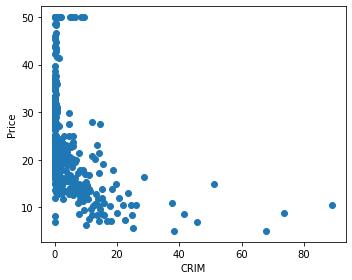

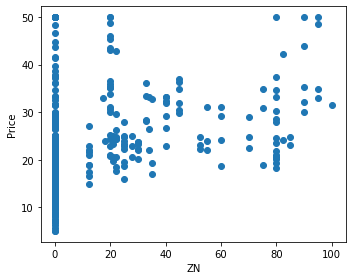

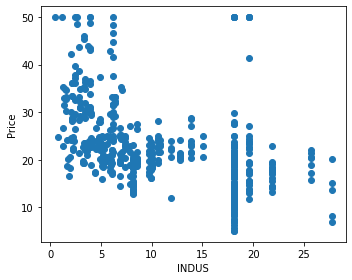

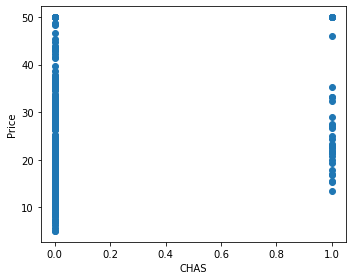

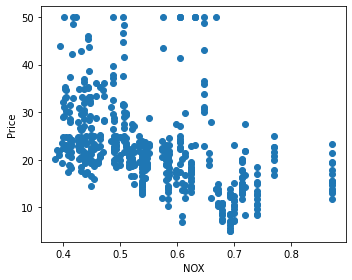

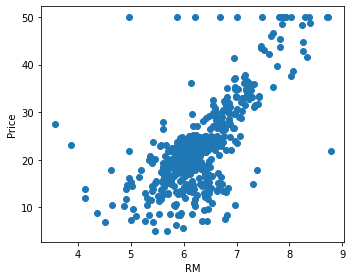

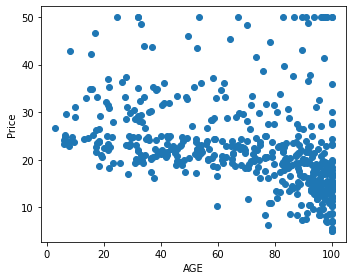

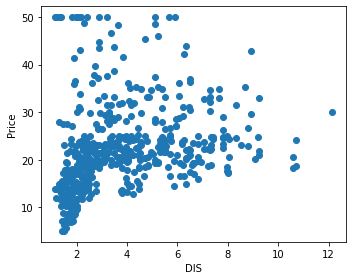

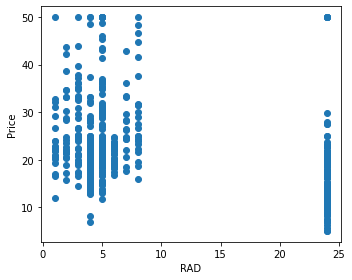

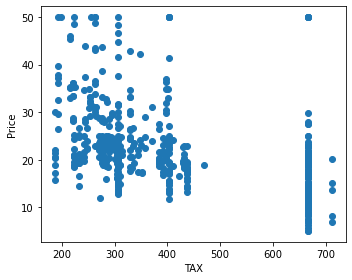

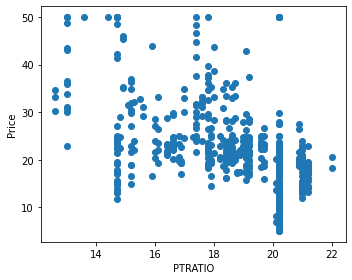

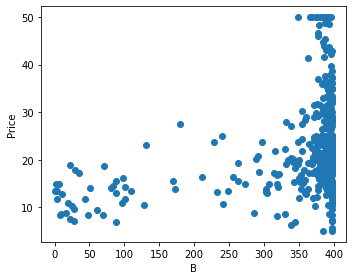

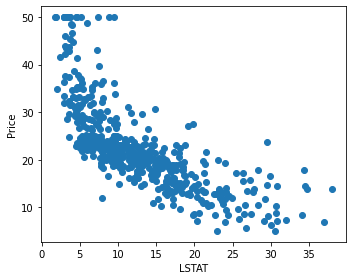

In [48]:
for index, feature_name in enumerate(data2.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(data2.data[:, index], data2.target)
    plt.ylabel('Price', size=10)
    plt.xlabel(feature_name, size=10)
    plt.tight_layout()

### b. Store all the features and targets into X and Y respectively. How many instances and how many features does the dataset have? Split the data into 70% training set and 30% test set.

In [42]:
#model has 13 features and 506 instances 
X_train, X_test, y_train, y_test = train_test_split(data2.data, data2.target, test_size =0.3, random_state =1)

In [43]:
X_train

array([[6.29760e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 8.26000e+00],
       [1.71710e-01, 2.50000e+01, 5.13000e+00, ..., 1.97000e+01,
        3.78080e+02, 1.44400e+01],
       [9.82349e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 2.12400e+01],
       ...,
       [5.87205e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.93700e+01],
       [3.30450e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.76750e+02, 1.08800e+01],
       [8.01400e-02, 0.00000e+00, 5.96000e+00, ..., 1.92000e+01,
        3.96900e+02, 8.77000e+00]])

In [44]:
y_train

array([20.4, 16. , 13.3, 30.8, 27.5, 24.4, 24.4, 25.1, 43.8, 21.9, 26.2,
       14.2, 20.8, 20.1, 23.1, 13.1, 16.2, 24.8, 20.2, 22.5, 14.8, 28.7,
       20.1, 23.4, 32. , 19.1, 50. , 20.9, 21.7, 22. , 17.2, 30.3, 12.3,
       21.4, 20.5, 35.2, 19.6, 22. , 21.7, 14.1, 21.1, 15. , 11.9, 20. ,
       41.3, 18.7, 50. , 50. , 18.4, 17.9, 28.1, 16.1, 17.2, 28.6, 23.6,
       20.4, 19.6, 18.8, 22.6, 17.7, 30.5, 18.2, 20.6, 24.4, 17.3, 13.3,
       22.8, 20.5, 21.2, 18.8, 18.9, 18.2, 23.1, 32.7, 24. , 10.2, 19.5,
       33.1, 13.4, 15.2, 24.8, 24.3,  9.5, 24.2, 18.5, 44. , 50. , 24.7,
       21.5,  8.4, 21.8, 50. , 23.8, 32.4, 24.4, 17.6, 29.8,  9.6, 16.7,
       13.8, 32. , 16.1,  8.3, 26.6, 14.3, 15. , 28.4, 32.2, 17.1, 29.4,
       10.4, 16.8, 31.5, 27.5, 46.7, 27.5, 17.2, 23.4, 31.6, 13.8, 22. ,
       17. , 24.8, 24.3, 25.2, 21.2, 20.6, 18.7,  5.6, 19.3, 19.8, 22.3,
       20.3, 12. , 23.9, 16.5, 13.2, 33.2, 10.5,  7.5, 27.5, 18.4, 23.2,
       13.8, 35.4, 23. , 25. ,  7.2, 14.4,  8.8, 22

### c. Train a linear regression model using  selected feature. 

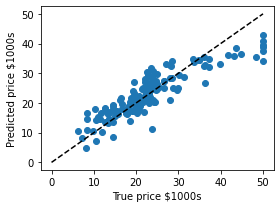

In [45]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price $1000s')
plt.ylabel('Predicted price $1000s')
plt.tight_layout()

### d. Test the model using the test set. Report sklearn.metrics.mean squared error and sklearn.metrics.r2 score between the predicting result and target.

In [46]:
print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))


RMS: 4.453237437198188 
